<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-9-kmeans-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

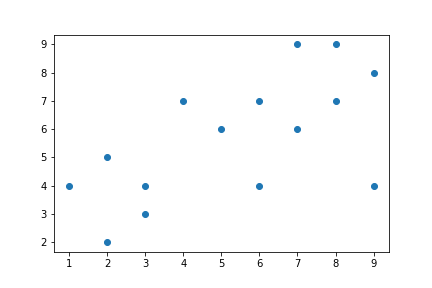

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# import sci-kit learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# 입력 data 정의
df = np.array([[1,4],[2,2],[2,5],[3,3],[3,4],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])
print ('Input data:')
print (df)

Input data:
[[1 4]
 [2 2]
 [2 5]
 [3 3]
 [3 4]
 [4 7]
 [5 6]
 [6 4]
 [6 7]
 [7 6]
 [7 9]
 [8 7]
 [8 9]
 [9 4]
 [9 8]]


In [3]:
len(df)

15

In [4]:
# cluster 개수 정의
n_clusters = 2

In [5]:
# K-mean 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10)

In [6]:
# k-mean cluster결과
y_pred = kmeans.fit_predict(df)

In [7]:
df

array([[1, 4],
       [2, 2],
       [2, 5],
       [3, 3],
       [3, 4],
       [4, 7],
       [5, 6],
       [6, 4],
       [6, 7],
       [7, 6],
       [7, 9],
       [8, 7],
       [8, 9],
       [9, 4],
       [9, 8]])

In [8]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
silhouette_avg = silhouette_score(df, y_pred)

In [10]:
silhouette_avg

0.5040262744935065

In [11]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, y_pred)

In [12]:
sample_silhouette_values

array([0.70504163, 0.68169968, 0.62877888, 0.69371363, 0.66895397,
       0.06599728, 0.21279744, 0.06737552, 0.5226113 , 0.55134625,
       0.5668474 , 0.62410155, 0.58795209, 0.38657716, 0.59660033])

In [13]:
print ('clusters:')
print (y_pred)

print ('kmeans.inertia:',kmeans.inertia_)
print ('kmeans.labels:',kmeans.labels_)
print ('kmeans.algorithm:',kmeans.algorithm)

clusters:
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
kmeans.inertia: 61.00000000000001
kmeans.labels: [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
kmeans.algorithm: lloyd


In [14]:
# select # of cluster
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
print ('sample_silhouette_values:\n', sample_silhouette_values)

For n_clusters = 2 The average silhouette_score is : 0.5040262744935065
sample_silhouette_values:
 [0.70504163 0.68169968 0.62877888 0.69371363 0.66895397 0.06599728
 0.21279744 0.06737552 0.5226113  0.55134625 0.5668474  0.62410155
 0.58795209 0.38657716 0.59660033]


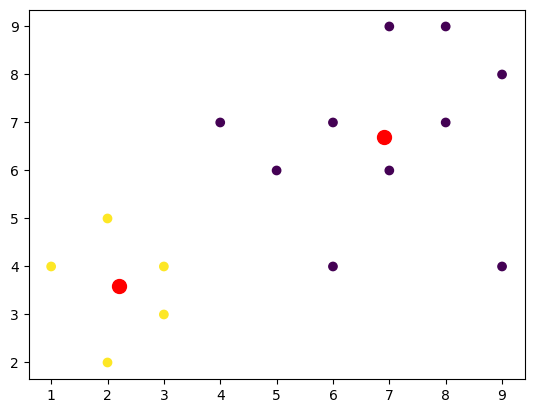

In [15]:
# plot
plt.scatter(df[:,0], df[:,1])
plt.savefig('05_kmeans_original.png')
plt.clf()

plt.scatter(df[:,0], df[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.savefig('05_kmeans_centers.png')